# Table of Contents

- **Data Representation**
- **Supervised Learning**
    - Classification Example
    - Regression Example
- **Unsupervised Learning**
    - Dimensionality Reduction: PCA
    - Clustering: K-means
- **Recap: Scikit-learn's estimator interface**
- **Evaluation Metrics**
- **Validation**
- **Cross-Validation**
- **Overfitting, Underfitting and Model Selection**
- **Feature Selection**
    - K-Best selection
- **Pipelines**


From the [sklearn tutorial](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/general_concepts.html) "Machine Learning 101: General Concepts"

[**scikit-learn**](http://scikit-learn.org) is a Python package designed to give access to well-known **machine learning algorithms within Python** code, through a clean, well-thought-out API. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

scikit-learn is built upon Python's [NumPy](http://www.numpy.org/) (Numerical Python) and [SciPy](http://www.scipy.org/) (Scientific Python) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is some work in this area.

In [36]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Data Representation

Most machine learning algorithms implemented in scikit-learn expect a **two-dimensional array or matrix** `X`, usually represented as a NumPy ndarray. The expected shape of `X` is `(n_samples, n_features)`.

* `n_samples`: The number of samples, where each sample is an item to process (e.g., classify). A sample can be a document, a picture, a sound, a video, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
* `n_features`:	The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. In this case we may use `scipy.sparse` matrices instead of NumPy arrays so as to make the data fit in memory.

The *supervised* machine learning algorithms implemented in scikit-learn also expect a **one-dimensional array** `y` with shape `(n_samples,)`. This array associated a target class to every sample in the input `X`.

![data-layout.png](images/data-layout.png)



As an example, we will explore the **Iris dataset**. The machine learning community often uses a simple flowers database where each row in the database (or CSV file) is a set of measurements of an individual iris flower. Each sample in this dataset is described by 4 features and can belong to one of three target classes:

**Features in the Iris dataset:**
 	
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

**Target classes to predict:**
 	
* Iris Setosa
* Iris Versicolour
* Iris Virginica

Scikit-Learn embeds a copy of the Iris CSV file along with a helper function to load it into NumPy arrays:

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()

In [38]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

The features of each sample flower are stored in the `data` attribute of the dataset:

In [39]:
n_samples, n_features = iris.data.shape

print(n_samples)
print(n_features)
print(iris.data[0])

150
4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the `target` attribute of the dataset:

In [40]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


This data is four dimensional, but we can visualize two of the dimensions at a time using a simple scatter-plot:

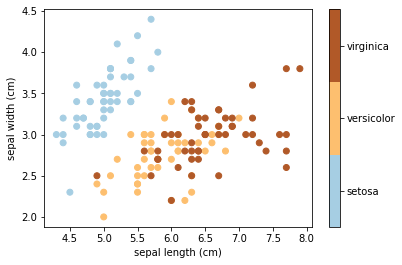

In [41]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, cmap=plt.cm.get_cmap('Paired', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.show()

The previous example deals with features that are readily available in a structured dataset with rows and columns of numerical or categorical values.

However, most of the produced data is not readily available in a structured representation such as SQL, CSV, XML, JSON or RDF.

How to turn unstructed data (e.g. text documents) items into arrays of numerical features?

A solution for **text documents** consists in counting the frequency of each word or pair of consecutive words in each document. This approach is called Bag of Words.
Note: we include other file formats such as HTML and PDF in this category: an ad-hoc preprocessing step is required to extract the plain text in UTF-8 encoding for instance.


## Supervised Learning

![supervised machine learning overview](images/plot_ML_flow_chart_12.png)

A supervised learning algorithm makes the distinction between the raw observed data `X` with shape `(n_samples, n_features)` and some label given to the model while training by some teacher. 
In scikit-learn this array is often noted `y` and has generally the shape `(n_samples,)`.

After training, the fitted model does no longer expect the `y` as an input: it will try to predict the most likely labels `y_new` for a new set of samples `X_new`.

Depending on the nature of the target `y`, supervised learning can be given different names:

* If `y` has values in a fixed set of **categorical outcomes** (represented by integers) the task to predict `y` is called **classification**.
* If `y` has **floating point values** (e.g. to represent a price, a temperature, a size...), the task to predict `y` is called **regression**.

### Classification Example

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [42]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


### Regression Example

One of the simplest regression problems is fitting a line to data.


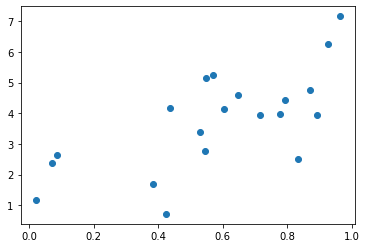

In [43]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o')
plt.show()

In [44]:
print(X.shape)


(20, 1)


Note that model.fit() typically expects a 2D array
You must reshape your data
- using array.reshape(-1, 1) if your data has a single feature
- using array.reshape(1, -1) if it contains a single sample

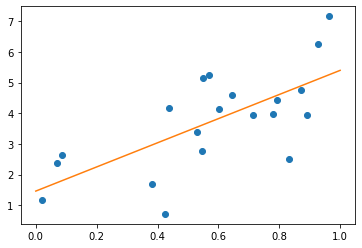

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X, y, 'o')
plt.plot(X_fit, y_fit)
plt.show()

Scikit-learn also has some more sophisticated models, which can respond to finer features in the data:

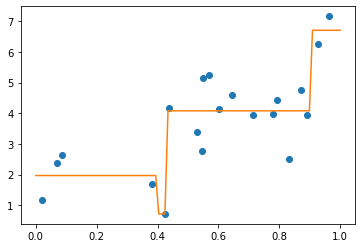

In [46]:
# Fit a DecisionTree
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(max_depth = 2)
model1.fit(X, y)


# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y1_fit = model1.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y1_fit)
plt.show()

## Unsupervised Learning

![unsupervised machine learning overview](images/plot_ML_flow_chart_32.png)

Unsupervised learning addresses a different sort of problem. Here the data has no labels, and we are interested in finding similarities between the objects in question. 
An unsupervised learning algorithm only uses a single set of observations `X` with shape `(n_samples, n_features)` and does not use any kind of labels.

Unsupervised learning comprises tasks such as *dimensionality reduction* and *clustering*. For example, in the Iris data discussed above, we can use unsupervised methods to determine combinations of the measurements which best display the structure of the data. 

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful features in heterogeneous data, and then these features can be used within a supervised framework.

### Dimensionality Reduction: PCA

Principle Component Analysis (PCA) is a dimensionality reduction technique that can find the combinations of variables that explain the most variance.

Consider the Iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it.

In [47]:
PCA?

Reduced dataset shape: (150, 2)


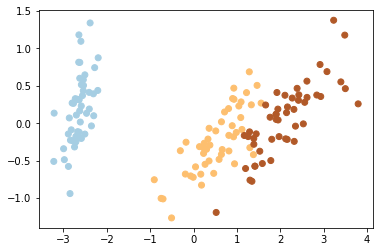

In [48]:
X, y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Paired')
plt.show()

### Clustering: K-means

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevant hidden structure of the data only if the criterion used highlights it.

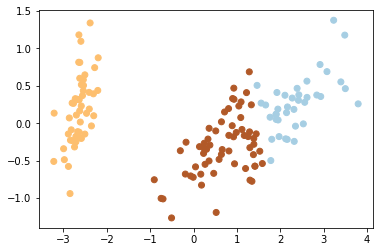

In [49]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='Paired')
plt.show()

### Exercise

- generate N clusters, each from a distinct random gaussian distribution (remember np.random.randn?), in a bi-dimensional attribute space,
- apply DBSCAN algorithm,
- apply the k-dist heuristic to find a proper parameter configuration.

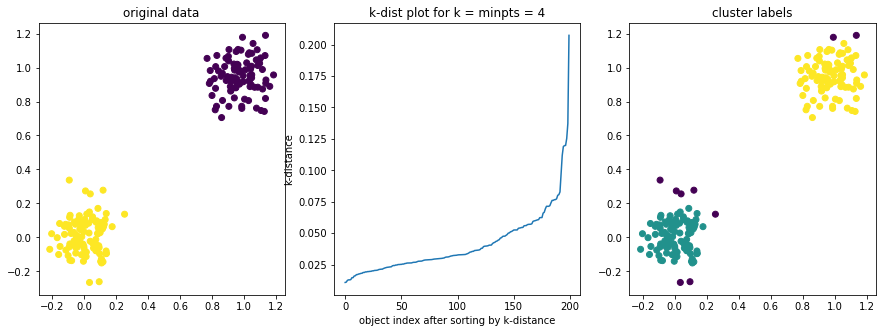

In [50]:
# Possible solution
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from sklearn.datasets import make_biclusters
from sklearn.cluster import DBSCAN

data,lab,_ = make_biclusters((200,2), 2, noise=0.1, minval=0, maxval=1,random_state = 42)

minpts = 4
nbrs = NearestNeighbors(n_neighbors=minpts).fit(data) 
distances, indices = nbrs.kneighbors(data)
k_dist = [x[-1] for x in distances]

dbclustering = DBSCAN(0.075,min_samples = 4)

labels = dbclustering.fit_predict(data)
f,ax = plt.subplots(1,3,figsize = (15,5))
ax[0].set_title('original data')
ax[0].scatter(data[:,0],data[:,1],c = lab[0])
ax[1].set_title('k-dist plot for k = minpts = 4') 
ax[1].plot(sorted(k_dist))
ax[1].set_xlabel('object index after sorting by k-distance')
ax[1].set_ylabel('k-distance')
ax[2].set_title('cluster labels')
ax[2].scatter(data[:,0],data[:,1],c = labels)

## Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods, and we have seen examples of these above. Every algorithm is exposed in scikit-learn via an **estimator** object. Given a scikit-learn estimator object named model, the following methods are available:

* Available in **all estimators**:
    - `model.fit()`: fit training data. 
        - For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`). 
        - For unsupervised learning applications, this accepts only a single argument, the data `X` (e.g. `model.fit(X)`).

* Available in **supervised estimators**:

    - `model.predict()`: given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`), and returns the learned label for each object in the array.
    - `model.predict_proba()`: For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
    - `model.score()`: for classification or regression problems, most estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

* Available in **unsupervised estimators**:

    - `model.predict()`: predict labels in clustering algorithms.
    - `model.transform()`: given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
    - `model.fit_transform()`: some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## Evaluation Metrics

Machine learning models are often used to predict the outcomes of a classification problem. Predictive models rarely predict everything perfectly, so there are many performance metrics that can be used to analyze our models.

When you run a prediction on your data to distinguish among two classes (*positive* and *negative* classes, for simplicity), your results can be broken down into 4 parts:

![classification_report.png](images/classification_report.png)

* **True Positives**: data in class *positive* that the model predicts will be in class *positive*;
* **True Negatives**: data in class *negative* that the model predicts will be in class *negative*;
* **False Positives**: data in class *negative* that the model predicts will be in class *positive*;
* **False Negatives**: data in class *positive* that the model predicts will be in class *negative*.

The most common performance metrics in this binary classification scenario are the following:

* **accuracy**: the fraction of observations (both positive and negative) predicted correctly:

$$ Accuracy = \frac{(TP+TN)}{(TP+FP+TN+FN)} $$
* **recall**: the fraction of positive observations that are predicted correctly:

$$ Recall = \frac{TP}{(TP+FN)} $$

* **precision**: the fraction of of predicted positive observations that are actually positive:

$$ Precision = \frac{TP}{(TP+FP)} $$

* **f1-score**: a composite measure that combines both precision and recall:

$$ F_1 = \frac{2 \cdot P \cdot R}{(P+R)}$$

The **confusion matrix** is useful for quickly calculating precision and recall given the predicted labels from a model. A confusion matrix for binary classification shows the four different outcomes: true positive, false positive, true negative, and false negative. The actual values form the columns, and the predicted values (labels) form the rows. The intersection of the rows and columns show one of the four outcomes. 

![confusion-matrix.png](images/confusion-matrix.png)

## Validation

Consider the digits example (8x8 images of handwritten digits). How might we check how well our model fits the data?

##### The WRONG way

In [16]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

print(digits.data.shape)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

y_pred = knn.predict(X)

print(f"{np.sum(y == y_pred)} / {len(y)} correct")

(1797, 64)
1797 / 1797 correct


It seems we have a perfect classifier! **What's wrong with this?**

Learning the parameters of a prediction function and testing it on the same data is a **methodological mistake**: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

A better way to test a model is to **use a hold-out set which doesn't participate in the training**, using scikit-learn's train/test split utility.

![Train-Test-Split-Diagram.jpg](images/Train-Test-Split-Diagram.jpg)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape

((1347, 64), (450, 64))

Now we train on the training data, and validate on the test data:

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f"{np.sum(y_test == y_pred)} / { len(y_test)} correct")


444 / 450 correct


This gives us a more reliable estimate of how our model is doing.

The metric we're using here, comparing the number of matches to the total number of samples, is known as the **accuracy score**, and can be computed using the following routine:

In [19]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))

0.9866666666666667


Let's quantify the classifier's prediction performance by generating a scikit-learn **classification report**:

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        41
           2       1.00      0.98      0.99        45
           3       0.93      1.00      0.97        57
           4       1.00      1.00      1.00        36
           5       0.97      0.97      0.97        38
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        47
           9       0.98      0.92      0.95        50

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



Confusion Matrix: from the [documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

Confusion matrix, without normalization
[[47  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 44  1  0  0  0  0  0  0]
 [ 0  0  0 57  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  1]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0  0  0  0 47  0]
 [ 0  0  0  3  0  1  0  0  0 46]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.98 0.02 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.97 0.   0.   0.   0.03]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.06 0.   0.02 0.   0.   0.   0.92]]


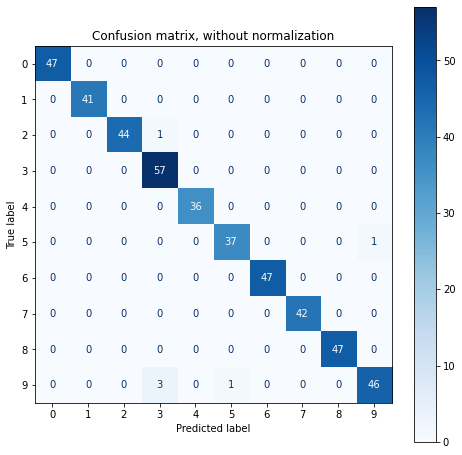

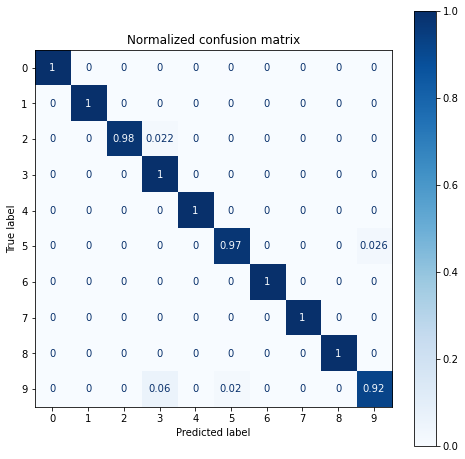

In [21]:
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    fig,ax = plt.subplots(1,1,figsize = (8,8))
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=range(10),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                 ax = ax)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Cross Validation

One problem with validation sets is that you "lose" some of the data. Above, we've only used 3/4 of the data for the training, and used 1/4 for the validation. 

Another option is to use **$K$-fold cross-validation**, where we split the data into $K$ chunks and perform $K$ fits, where each chunk gets a turn as the validation set:

In [22]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(KNeighborsClassifier(3), X, y, cv=10)

print(cv.mean())

0.9766325263811299


In standard $K$-fold cross-validation, we partition the data into $K$ subsets, called **folds**. Then, we iteratively train the algorithm on $k-1$ folds while using the remaining fold as the test set (called the “**holdout fold**”):

![Cross-Validation-Diagram.jpg](images/Cross-Validation-Diagram.jpg)

## Overfitting, Underfitting and Model Selection

The issues associated with validation and cross-validation are some of the most important aspects of the practice of machine learning. Selecting the optimal model for your data is vital, and is a piece of the problem that is not often appreciated by machine learning practitioners.

Of core importance is the following question: **if our estimator is underperforming, how should we move forward?**
How do we address this question?

* Use simpler or more complicated model?
* Add more features to each observed data point?
* Add more training samples?

The answer is often counter-intuitive. In particular, sometimes using a more complicated model will give worse results. Also, sometimes adding training data will not improve your results.

**Generalization** refers to how well the concepts learned by a machine learning model apply to *specific examples not seen by the model when it was learning*.
The goal of a good machine learning model is to *generalize well from the training data to any data* from the problem domain. This allows us to make predictions in the future on data the model has never seen.

There is a terminology used in machine learning when we talk about how well a machine learning model learns and generalizes to new data, namely *underfitting* and *overfitting*.
Underfitting and overfitting are the two biggest causes for poor performance of machine learning algorithms.

**Underfitting** refers to a model that can neither model the training data nor generalize to new data.
An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data. Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms.

**Overfitting** refers to a model that models the training data too well.
Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

To illustrate overfitting, we'll work with a simple linear regression problem.

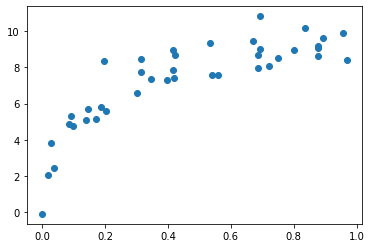

In [23]:
def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error) # ravel returns a contiguous flattened array.
    
    return X, y

X, y = make_data(40, error=1)

plt.scatter(X.ravel(), y) 
plt.show()

Now we want to perform a regression on this data, using the scikit-learn built-in linear regression function to compute a fit:

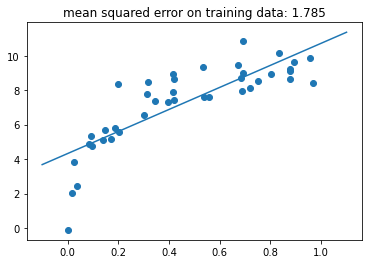

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, y)

X_test = np.linspace(-0.1, 1.1, 500).reshape(500,1)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title(f"mean squared error on training data: {mean_squared_error(model.predict(X), y):.3f}")
plt.show()

We have fit a straight line to the data, but clearly this model is not a good choice: *this model under-fits the data.*

We try to improve this by creating a more complicated model. We can do this by adding degrees of freedom, and computing a polynomial regression over the inputs. 

Let's make a convenience routine to do this:

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs): # **kwargs is used to pass the variable keyword arguments to the function 
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Let see what happens with a 2-degrees and a 30-degrees polynomial regression:

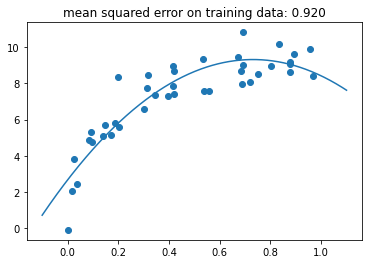

In [26]:
model = PolynomialRegression(2)
model.fit(X, y)

y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title(f"mean squared error on training data: {mean_squared_error(model.predict(X), y):.3f}")
plt.show()

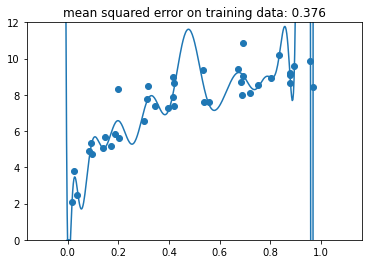

In [27]:
model = PolynomialRegression(30)
model.fit(X, y)

y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.ylim([0,12])
plt.title(f"mean squared error on training data: {mean_squared_error(model.predict(X), y):.3f}")
plt.show()

In the first case (2 degrees) we have a much better fit, while in the second case (30 degrees), this model is not a good choice again.

We can use cross-validation to get a better handle on how the model fit is working. Let's do this here.
For a visual assessment of the performance, we will use the `validation_curve` utility. To make things more clear, we'll use a slightly larger dataset.

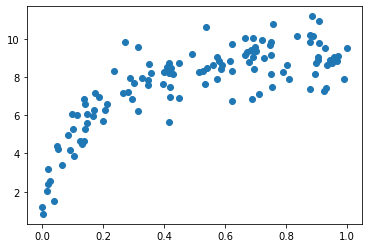

In [28]:
X, y = make_data(120, error=1.0)
plt.scatter(X, y);
plt.show()

In [29]:
from sklearn.model_selection import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

degree = np.arange(0, 30)
val_train, val_test = validation_curve(PolynomialRegression(), X, y,
                                       param_name = 'polynomialfeatures__degree', 
                                       param_range = degree,
                                       cv=7,
                                       scoring=rms_error)

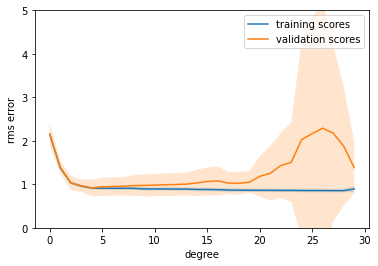

In [30]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(degree, val_train, label='training scores')
plot_with_err(degree, val_test, label='validation scores')
plt.ylim([0,5])
plt.xlabel('degree'); plt.ylabel('rms error')
plt.legend()
plt.show()

Notice the trend here, which is common for this type of plot.

* For a small model complexity, the training error and validation error are very similar. This indicates that the model is *under-fitting the data*: it doesn't have enough complexity to represent the data.
* As the model complexity grows, the training and validation scores diverge. This indicates that the model is *over-fitting the data*: it has so much flexibility, that it fits the noise rather than the underlying trend. 
* Note that the training score (nearly) always improves with model complexity. This is because a more complicated model can fit the noise better, so the model improves. The validation data generally has a sweet spot, which here is around 5 terms.


## Feature Selection

The dataset we want to feed into our machine learning model could include a vast amount of features. Among them, there can be *redundant* as well as *irrelevant* features. **Redundant features** convey the same information contained in other features, while **irrelevant features** regard information useless for the learning process.

While a domain expert could recognize such features, the process will be long or almost impossible to be carried out by hand. The **feature selection** methods aim at reducing automatically the number of features in a dataset without negatively impacting the predictive power of the learned model.

Three benefits of performing feature selection before modeling your data are:

* **Reduces overfitting**: less redundant data means less opportunity to make decisions based on noise.
* **Improves accuracy**: less misleading data means modeling accuracy improves.
* **Reduces training time**: less data means that algorithms train faster.

The classes in the `sklearn.feature_selection` module can be used for feature selection/dimensionality reduction on sample sets.

The simplest baseline approach to feature selection is `VarianceThreshold`. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [31]:
from sklearn.feature_selection import VarianceThreshold

X = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]])
print(X)

feat_selector = VarianceThreshold(threshold=0.16)
X_sel = feat_selector.fit_transform(X)
print(X_sel)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]
[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


### K-Best selection

`SelectKBest` removes all but the $k$ highest scoring features, in terms of $\chi^2$

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

feat_selector = SelectKBest(chi2,k=2) 
print(iris.data.shape)

X_sel = feat_selector.fit_transform(iris.data, iris.target)
print(X_sel.shape)

(150, 4)
(150, 2)


The `SelectKBest` object takes as input a scoring function that returns univariate scores. As scoring function, you may use:
- For regression: `f_regression`, `mutual_info_regression`
- For classification: `chi2`, `f_classif`, `mutual_info_classif`

The methods based on **F-test** estimate the degree of linear dependency between two random variables. On the other hand, **mutual information** methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

# Pipelines
- from the [User guide](https://scikit-learn.org/stable/modules/compose.html#pipeline)

Pipeline can be used to **chain multiple estimators into one**. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

- Convenience and encapsulation: you only have to call **fit and predict once on your data** to fit a whole sequence of estimators.

- Joint parameter selection: you can **grid search over parameters of all estimators** in the pipeline at once.

- Safety: pipelines help **avoid leaking statistics from your test data into the trained model in cross-validation**, by ensuring that the same samples are used to train the transformers and predictors.



In [33]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA(n_components=0.95)), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('reduce_dim', PCA(n_components=0.95)), ('clf', SVC())])

If properly built, a pipeline can be passed to the `cross_val_score` function, since pipelines are special instances of estimators:  

In [34]:
X, y = iris.data, iris.target
cross_val_score(pipe,X,y,cv = 6)

array([0.92, 1.  , 0.96, 0.92, 0.96, 1.  ])

How to access to a specific step of the pipeline?

In [35]:
pipe.steps[0][1]

PCA(n_components=0.95)

Note that:
- All estimators in a pipeline, except the last one, must be transformers (i.e. must have a `transform` method). 
- The last estimator may be any type (transformer, classifier, etc.)

Indeed you can include in your pipeline pretty any function for:
- [preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- [feature extraction](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction)
- [feature selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
- classification / clustering


**Exercise**: Classification
- Download the rough [Hepatitis dataset from UCI](https://archive.ics.uci.edu/ml/datasets/hepatitis) (you should already be familiar with it)
- Load it in Python
- Perform the data preprocessing steps that you consider appropriate
- Compare different classification algorithms and feature selection approaches
- Report the results





# Misc

Not everything you may need is immediately available in sklearn... but it is very likely that someone has already written it in Python.

Need an advanced module for **imbalanced learning**?
- pip (or conda) install [imblearn](https://github.com/scikit-learn-contrib/imbalanced-learn)

Need to perform statistical tests
- use [scipy module](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)